# Chargement des libs et des données

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
data = pd.read_parquet('data.parquet')
data.shape

(1428, 17)

In [3]:
data.head()

,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount
0,Chanel,2023-11-17,DEU,EUR,CHANEL,FASHION,HANDBAGS,N.A.,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & B...,https://www.chanel.com/de/mode/p/AS4152B13455N...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5200.0,5200.0,5200.0,5200.0,0
1,Chanel,2023-11-17,DEU,EUR,CHANEL,FASHION,HANDBAGS,N.A.,PA67085Y09953,n.a.,https://www.chanel.com/de/mode/p/A67085Y099539...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5750.0,5750.0,5750.0,5750.0,0
2,Chanel,2023-11-17,DEU,EUR,CHANEL,EYEWEAR,BLUE LIGHT GLASSES,N.A.,PA71441,Schwarz,https://www.chanel.com/de/brillen/p/A71441X081...,https://res.cloudinary.com/dwayrkp5z/image/fet...,420.0,420.0,420.0,420.0,0
3,Chanel,2023-11-17,DEU,EUR,CHANEL,EYEWEAR,SUNGLASSES,N.A.,PA71449,Silberfarben. Gläser: Braun Mit Verlauf,https://www.chanel.com/de/brillen/p/A71449X099...,https://res.cloudinary.com/dwayrkp5z/image/fet...,580.0,580.0,580.0,580.0,0
4,Chanel,2023-11-17,DEU,EUR,CHANEL,EYEWEAR,SUNGLASSES,N.A.,PA71466,Blau & Rosa. Gläser: Grau Mit Verlauf,https://www.chanel.com/de/brillen/p/A71466X010...,https://res.cloudinary.com/dwayrkp5z/image/fet...,480.0,480.0,480.0,480.0,0


In [24]:
data.describe()

,full_price,price,full_price_eur,price_eur
count,1428.000000,1428.000000,1428.000000,1428.000000
mean,6076.253725,6076.253725,6076.253725,6076.253725
std,15219.005999,15219.005999,15219.005999,15219.005999
min,23.000000,23.000000,23.000000,23.000000
25%,195.000000,195.000000,195.000000,195.000000
50%,1415.000000,1415.000000,1415.000000,1415.000000
75%,5800.000000,5800.000000,5800.000000,5800.000000
max,142000.000000,142000.000000,142000.000000,142000.000000


# Suppression de colonnes

In [ ]:
#On vérifie si on doit des drop des colonnes parce que trop de valeurs manquantes
data.isna().sum()
#Aucune colonne à drop

website_name       0
competence_date    0
country_code       0
currency_code      0
brand              0
category1_code     0
category2_code     0
category3_code     0
product_code       0
title              0
itemurl            0
imageurl           0
full_price         0
price              0
full_price_eur     0
price_eur          0
flg_discount       0
dtype: int64

Certaines colonnes ont l'air d'avoir une seule valeur pour toutes les entrées, on vérifie cela.

In [22]:
for colonne in data.columns:
    if data[colonne].nunique() == 1 :
        data.drop(colonne, axis = 1, inplace = True)
        print("La colonne " + colonne + "a été supprimée")


La colonne website_namea été supprimée
La colonne competence_datea été supprimée
La colonne country_codea été supprimée
La colonne currency_codea été supprimée
La colonne branda été supprimée
La colonne category3_codea été supprimée
La colonne flg_discounta été supprimée


In [23]:
data.head()

,category1_code,category2_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur
0,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & B...,https://www.chanel.com/de/mode/p/AS4152B13455N...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5200.0,5200.0,5200.0,5200.0
1,FASHION,HANDBAGS,PA67085Y09953,n.a.,https://www.chanel.com/de/mode/p/A67085Y099539...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5750.0,5750.0,5750.0,5750.0
2,EYEWEAR,BLUE LIGHT GLASSES,PA71441,Schwarz,https://www.chanel.com/de/brillen/p/A71441X081...,https://res.cloudinary.com/dwayrkp5z/image/fet...,420.0,420.0,420.0,420.0
3,EYEWEAR,SUNGLASSES,PA71449,Silberfarben. Gläser: Braun Mit Verlauf,https://www.chanel.com/de/brillen/p/A71449X099...,https://res.cloudinary.com/dwayrkp5z/image/fet...,580.0,580.0,580.0,580.0
4,EYEWEAR,SUNGLASSES,PA71466,Blau & Rosa. Gläser: Grau Mit Verlauf,https://www.chanel.com/de/brillen/p/A71466X010...,https://res.cloudinary.com/dwayrkp5z/image/fet...,480.0,480.0,480.0,480.0


On a vu dans le *describe* que les colonnes ont l'air de toujours contenir les mêmes valeurs :

- **full_price**
- **price**
- **full_price_eur**
- **price_eur**

In [25]:
colonnes = ['full_price', 'price', 'full_price_eur', 'price_eur']
(data[colonnes].nunique(axis=1)==1).all()

True

On a **True** donc toutes les colonnes sont bien identiques. On en garde donc qu'une seule.

In [26]:
colonnes = ['full_price','full_price_eur', 'price_eur']
data.drop(colonnes, axis=1, inplace=True)

In [27]:
data.head()

,category1_code,category2_code,product_code,title,itemurl,imageurl,price
0,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & B...,https://www.chanel.com/de/mode/p/AS4152B13455N...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5200.0
1,FASHION,HANDBAGS,PA67085Y09953,n.a.,https://www.chanel.com/de/mode/p/A67085Y099539...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5750.0
2,EYEWEAR,BLUE LIGHT GLASSES,PA71441,Schwarz,https://www.chanel.com/de/brillen/p/A71441X081...,https://res.cloudinary.com/dwayrkp5z/image/fet...,420.0
3,EYEWEAR,SUNGLASSES,PA71449,Silberfarben. Gläser: Braun Mit Verlauf,https://www.chanel.com/de/brillen/p/A71449X099...,https://res.cloudinary.com/dwayrkp5z/image/fet...,580.0
4,EYEWEAR,SUNGLASSES,PA71466,Blau & Rosa. Gläser: Grau Mit Verlauf,https://www.chanel.com/de/brillen/p/A71466X010...,https://res.cloudinary.com/dwayrkp5z/image/fet...,480.0


# Distribution des colonnes

### Colonnes category1 et category2

<Axes: ylabel='count'>

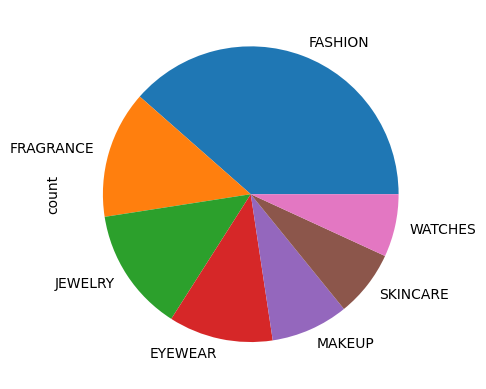

In [28]:
data.category1_code.value_counts().plot.pie()

In [ ]:
data.category2_code.value_counts()
#On voit que la répartition est très hétérogène

category2_code
READY-TO-WEAR                  243
COSTUME JEWELRY                127
SUNGLASSES                      99
WOMEN                           88
WATCHES                         87
MEN                             72
HANDBAGS                        61
COCO CRUSH                      54
SHOES                           42
FACE                            41
EYEGLASSES                      40
SMALL LEATHER GOODS             38
BATH AND BODY                   36
MOISTURIZERS                    35
EYES                            35
RINGS                           35
NECKLACES                       30
BRUSHES AND ACCESSORIES         26
EARRINGS                        26
BLUE LIGHT GLASSES              24
LIPS                            21
N°5                             15
TONERS & LOTIONS                11
EXCEPTIONAL PIECES              11
CLEANSERS & MAKEUP REMOVERS     11
BELTS                           10
HEADWEAR                         9
OILS                             9
BRACE

### Colonne price

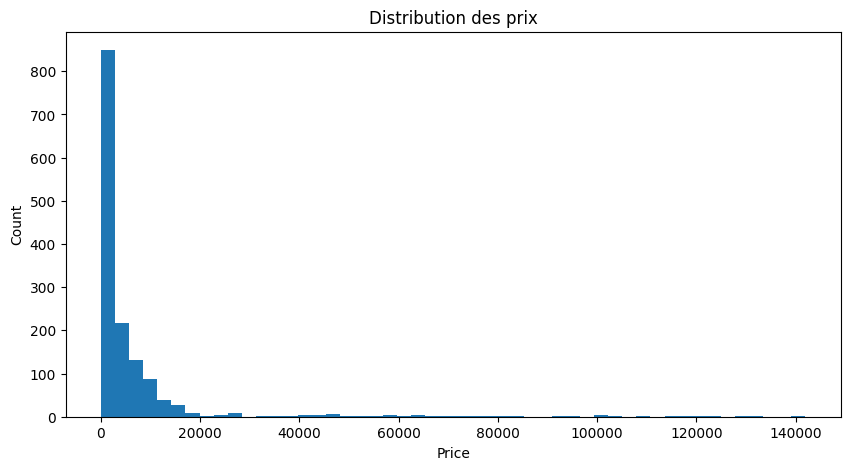

In [38]:
plt.figure(figsize=(10, 5))
plt.hist(data['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution des prix')
plt.show()

In [42]:
data.nlargest(5,'price')

,category1_code,category2_code,product_code,title,itemurl,imageurl,price
1216,JEWELRY,RINGS,PJ63142,18 Karat Weißgold Diamanten schwarze Spinelle,https://www.chanel.com/de/schmuck/p/J63142/com...,https://res.cloudinary.com/dwayrkp5z/image/fet...,142000.0
790,JEWELRY,LES INTEMPORELS DE CHANEL,PJ60909,18 Karat Weißgold Diamanten,https://www.chanel.com/de/schmuck/p/J60909/rub...,https://res.cloudinary.com/dwayrkp5z/image/fet...,132000.0
1332,WATCHES,EXCEPTIONAL PIECES,PPH7431,Extrem widerstandsfähige weiße Keramik und Wei...,https://www.chanel.com/de/uhren/p/H7431/j12-ba...,https://res.cloudinary.com/dwayrkp5z/image/fet...,130000.0
788,JEWELRY,BRACELETS,PJ2831,18 Karat Weißgold Diamanten,https://www.chanel.com/de/schmuck/p/J2831/come...,https://res.cloudinary.com/dwayrkp5z/image/fet...,123000.0
437,WATCHES,EXCEPTIONAL PIECES,PPH6949,Großes Modell BEIGEGOLD und Diamanten goldbr...,https://www.chanel.com/de/uhren/p/H6949/boy-fr...,https://res.cloudinary.com/dwayrkp5z/image/fet...,120000.0


In [43]:
# Majorité des prix entre 0 et 20 0000
# faire code pour avoir stats propres
# voir si besoin de drop les outliers ou quoi

### Colonne title

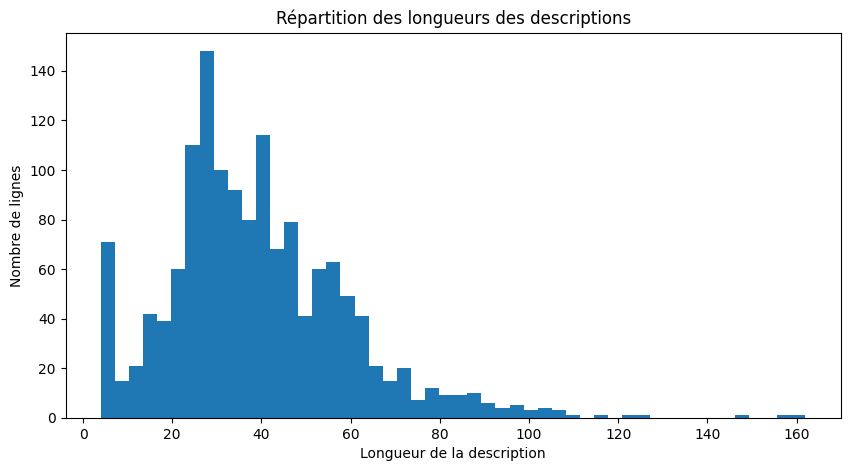

In [47]:
plt.figure(figsize=(10,5))
plt.hist(data['title'].str.len(), bins=50)
plt.xlabel('Longueur de la description')
plt.ylabel('Nombre de lignes')
plt.title('Répartition des longueurs des descriptions')
plt.show()

In [48]:
#supprimer outliers de description ? 
# Tous ceux au dessus de 110 ? 
# ou les tronquer ?